In [ ]:
%load_ext autoreload
%autoreload 2

In [32]:
from sensitivity_tests import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import os

In [3]:
# Ranking Algorithms
colley = ColleyRankingAlgorithm()
massey = MasseyRankingAlgorithm()
lop_alg = LOPRankingAlgorithm()

# Rankability Metric
rMetric = PDiversityMetric()

In [4]:
noise_levels = np.linspace(0.0, 1.0, num=200, endpoint=True)
n_trials = 200
n_items = 16

lop_taus = []
massey_taus = []
colley_taus = []
noise_vals = []
for noise in tqdm(noise_levels):
    if noise == 0.0 or noise == 1.0:
        continue
    inst = ProblemInstance(PerfectBinarySource(n=n_items), BinaryFlipNoise(noisePercentage=noise))
    _, taus = inst.get_sensitivity(lop_alg, [rMetric], n_trials=n_trials, progress_bar=False)
    lop_taus.extend(taus)
    _, taus = inst.get_sensitivity(massey, [rMetric], n_trials=n_trials, progress_bar=False)
    massey_taus.extend(taus)
    _, taus = inst.get_sensitivity(colley, [rMetric], n_trials=n_trials, progress_bar=False)
    colley_taus.extend(taus)
    noise_vals.extend([noise]*n_trials)

100%|██████████| 400/400 [8:37:46<00:00, 77.67s/it]  


In [43]:
def plot_taus(noise, taus, method_name, scatter_alpha=0.01, histogram_bins=30, save_dir="figures"):
    # Create directory for saving if specified
    saving = False
    if save_dir is not None and save_dir != "":
        Path(save_dir).mkdir(parents=True, exist_ok=True)
        saving = True
    
    # Plot scatter plot
    plt.scatter(noise, taus, alpha=scatter_alpha)
    title = "%s Sensitivity Scatter" % method_name
    plt.title(title)
    plt.xlabel('Percentage Flipped')
    plt.xlim(0.0, 1.0)
    plt.ylabel('Tau')
    plt.ylim(-1.0, 1.0)
    if saving:
        save_path = os.path.join(save_dir, title.replace(" ", "_") + ".png")
        plt.savefig(save_path)
    plt.show()
    
    # Plot 2D Histogram
    plt.hist2d(noise, taus, bins=histogram_bins, range=[[0.0, 1.0], [-1.0, 1.0]])
    title = "%s Sensitivity Histogram" % method_name
    plt.title(title)
    plt.xlabel('Percentage Flipped')
    plt.ylabel('Tau')
    if saving:
        save_path = os.path.join(save_dir, title.replace(" ", "_") + ".png")
        plt.savefig(save_path)
    plt.show()

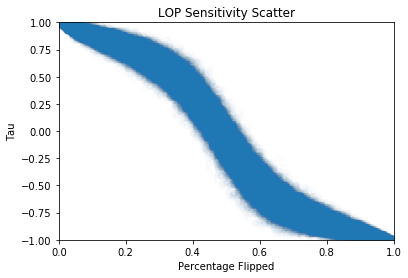

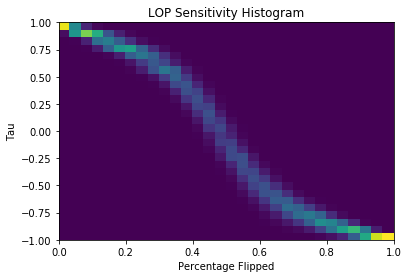

In [44]:
plot_taus(noise_vals, lop_taus, "LOP")

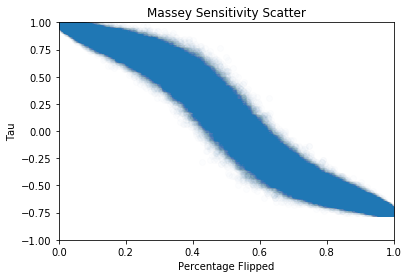

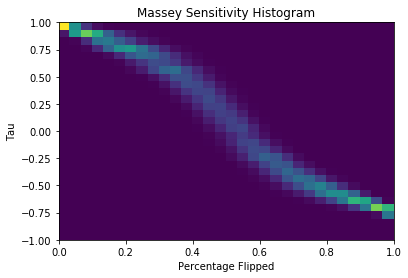

In [45]:
plot_taus(noise_vals, massey_taus, "Massey")

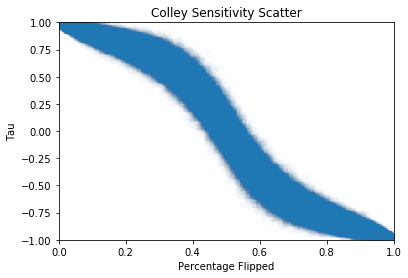

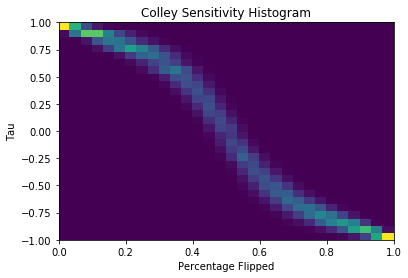

In [46]:
plot_taus(noise_vals, colley_taus, "Colley")